In [1]:
import sys

sys.path.append('../')

import keras4torch as k4t
import torch
from torch import nn
from sklearn.datasets import load_iris
import numpy as np
from keras4torch.metrics import *

In [2]:
X, y = load_iris(return_X_y=True)
X = X.astype(np.float32)
y = y.astype(np.int64)

In [3]:
import pandas
import numpy
pandas.__version__, numpy.__version__

('1.1.1', '1.19.1')

In [4]:
model = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(),
    nn.Sequential(
        nn.Linear(128, 64), nn.ReLU()
    ),
    nn.Linear(64, 3)
)

model = k4t.Model(model)

In [5]:
def accuracy(y_pred, y_true):
    right_cnt = (y_pred.argmax(-1) == y_true).sum()
    return right_cnt * 1.0 / y_true.shape[0]

model.compile(optimizer='adam', loss='ce_loss', metrics=['acc'])

In [6]:
model.summary(input_shape=[4])

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 128]                 640
├─ReLU: 1-2                              [-1, 128]                 --
├─Sequential: 1-3                        [-1, 64]                  --
|    └─Linear: 2-1                       [-1, 64]                  8,256
|    └─ReLU: 2-2                         [-1, 64]                  --
├─Linear: 1-4                            [-1, 3]                   195
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04


In [7]:
history = model.fit(X, y,
            epochs=15,
            validation_split=0.2,
            )

Train on 120 samples, validate on 30 samples:
Epoch 1/15 - 0.1s - loss: 1.0406 - acc: 0.4740 - val_loss: 0.9171 - val_acc: 0.7000 - lr: 1e-03
Epoch 2/15 - 0.0s - loss: 0.8825 - acc: 0.6979 - val_loss: 0.8868 - val_acc: 0.7333 - lr: 1e-03
Epoch 3/15 - 0.0s - loss: 0.8266 - acc: 0.6927 - val_loss: 0.7940 - val_acc: 0.7000 - lr: 1e-03
Epoch 4/15 - 0.0s - loss: 0.7497 - acc: 0.6615 - val_loss: 0.6905 - val_acc: 0.7333 - lr: 1e-03
Epoch 5/15 - 0.0s - loss: 0.6810 - acc: 0.6641 - val_loss: 0.6108 - val_acc: 0.8667 - lr: 1e-03
Epoch 6/15 - 0.0s - loss: 0.6252 - acc: 0.8177 - val_loss: 0.5495 - val_acc: 0.9000 - lr: 1e-03
Epoch 7/15 - 0.0s - loss: 0.5773 - acc: 0.7500 - val_loss: 0.5015 - val_acc: 0.8000 - lr: 1e-03
Epoch 8/15 - 0.0s - loss: 0.5293 - acc: 0.7422 - val_loss: 0.4535 - val_acc: 0.9000 - lr: 1e-03
Epoch 9/15 - 0.0s - loss: 0.4859 - acc: 0.9115 - val_loss: 0.4163 - val_acc: 0.9333 - lr: 1e-03
Epoch 10/15 - 0.0s - loss: 0.4565 - acc: 0.9089 - val_loss: 0.3837 - val_acc: 0.9333 - lr:

<AxesSubplot:>

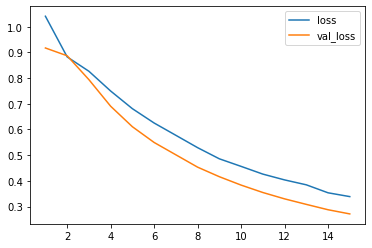

In [8]:
history.plot(kind='line', y=['loss', 'val_loss'])

In [9]:
model.evaluate(X, y)

OrderedDict([('loss', 0.32095456), ('acc', 0.9784091)])

In [10]:
model.predict(X)

array([[ 3.6031659 ,  0.12945846, -2.8445425 ],
       [ 3.0881958 ,  0.24681666, -2.5191884 ],
       [ 3.304629  ,  0.11464036, -2.6264944 ],
       [ 2.9662519 ,  0.21738786, -2.4152184 ],
       [ 3.6394908 ,  0.08945101, -2.848618  ],
       [ 3.674839  ,  0.18944839, -2.9075942 ],
       [ 3.2971473 ,  0.08662041, -2.604949  ],
       [ 3.384935  ,  0.17970923, -2.7098718 ],
       [ 2.8269465 ,  0.20215514, -2.3129444 ],
       [ 3.1026783 ,  0.26000386, -2.5318074 ],
       [ 3.7811444 ,  0.15508887, -2.9836762 ],
       [ 3.1949615 ,  0.20140728, -2.5717397 ],
       [ 3.089293  ,  0.22772148, -2.5151744 ],
       [ 3.173334  ,  0.05819321, -2.4997525 ],
       [ 4.3687115 ,  0.08731961, -3.3448415 ],
       [ 4.347366  ,  0.04194509, -3.314373  ],
       [ 4.025144  ,  0.06240199, -3.09659   ],
       [ 3.5723953 ,  0.13110077, -2.8242953 ],
       [ 3.730679  ,  0.2603067 , -2.979381  ],
       [ 3.7115214 ,  0.08722831, -2.8972309 ],
       [ 3.2916534 ,  0.34068236, -2.687